*SAFA* *UMATIA*

## **Prediction Using Decision Tree Algorithm**

---



Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
iris = pd.read_csv("/content/drive/MyDrive/ML Datasets/Iris.csv")

EDA

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.shape

(150, 6)

In [ ]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


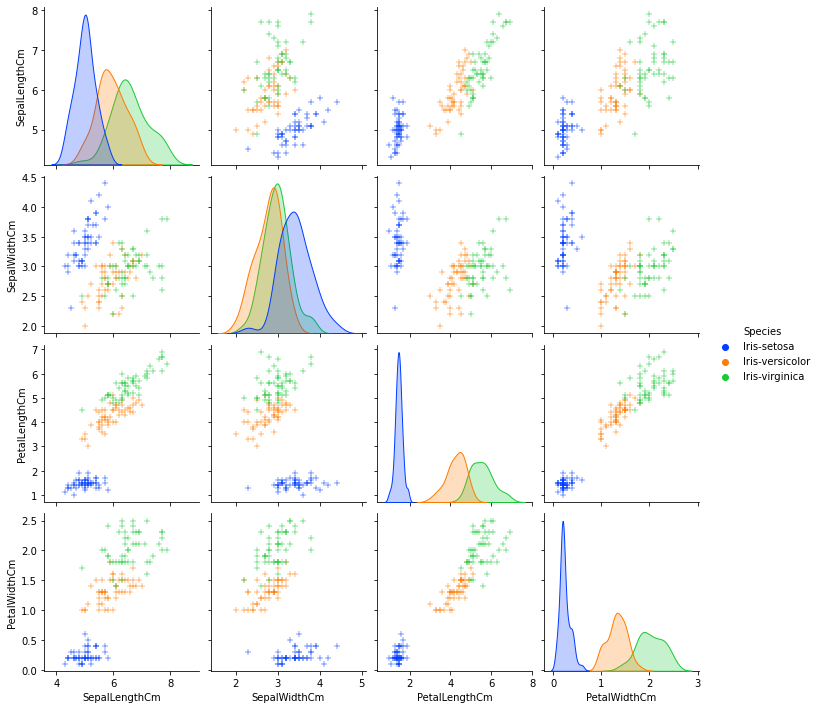

In [ ]:
temp = iris.drop('Id', axis=1)
featuresplot = sns.pairplot(temp, hue='Species', markers='+', palette='bright')
plt.show()

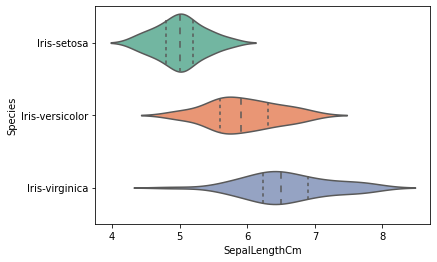

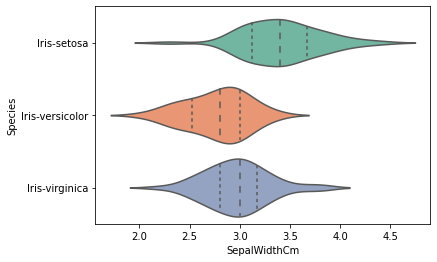

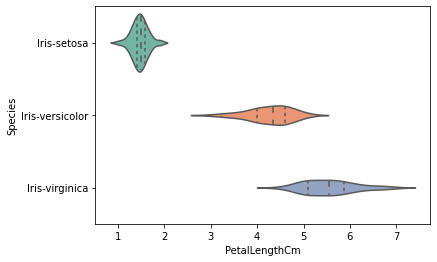

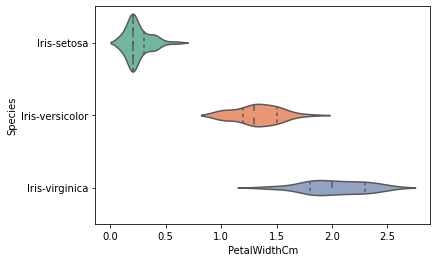

In [ ]:
plot = sns.violinplot(y='Species', x='SepalLengthCm', data=iris, inner='quartile', palette="Set2")
plt.show()
plot = sns.violinplot(y='Species', x='SepalWidthCm', data=iris, inner='quartile', palette="Set2")
plt.show()
plot = sns.violinplot(y='Species', x='PetalLengthCm', data=iris, inner='quartile', palette="Set2")
plt.show()
plot = sns.violinplot(y='Species', x='PetalWidthCm', data=iris, inner='quartile', palette="Set2")
plt.show()

Data Splitting into Train and Test

In [ ]:
X = iris.drop(['Id', 'Species'], axis=1)
y = iris['Species']
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
(150, 4)
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object
(150,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, y, random_state = 50, test_size = 0.2)

Model Implementation

Using Gini Index

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score
prediction = model.predict(X_test)
print(accuracy_score(y_true=y_test, y_pred=prediction))

0.9666666666666667


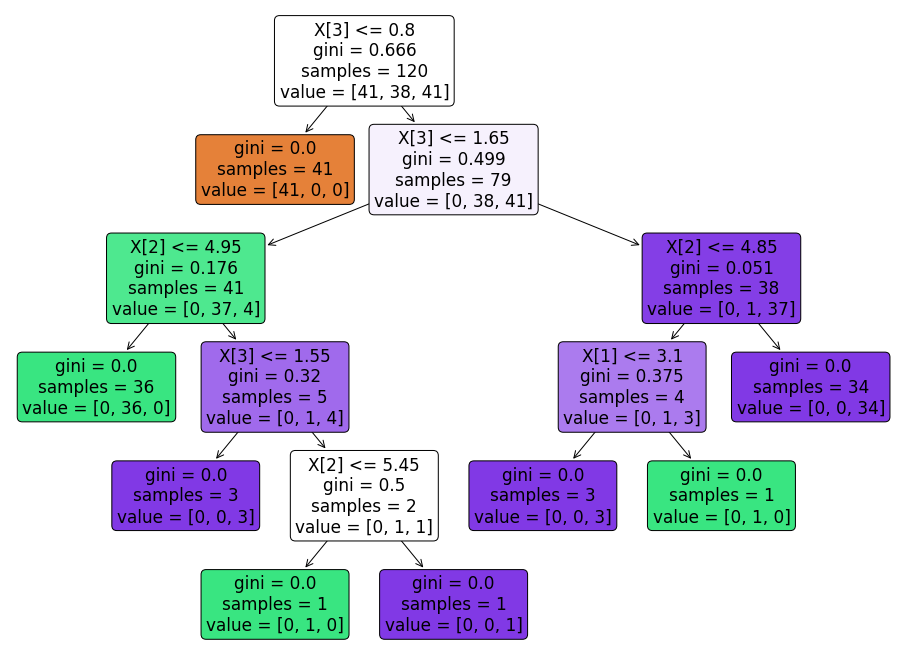

In [ ]:
#Visualising the Tree
from sklearn.tree import plot_tree
plt.figure(figsize = (16,12))
# Plot the decision tree.
plot_tree(model,rounded = True,filled = True)
# Display the tree plot figure.
plt.show()


Using Entropy

In [ ]:
model1= DecisionTreeClassifier(criterion='entropy', max_depth=5)
model1.fit(X_train,y_train)
pred = accuracy_score(y_true=y_test, y_pred=model1.predict(X_test))
print(pred)

0.9666666666666667


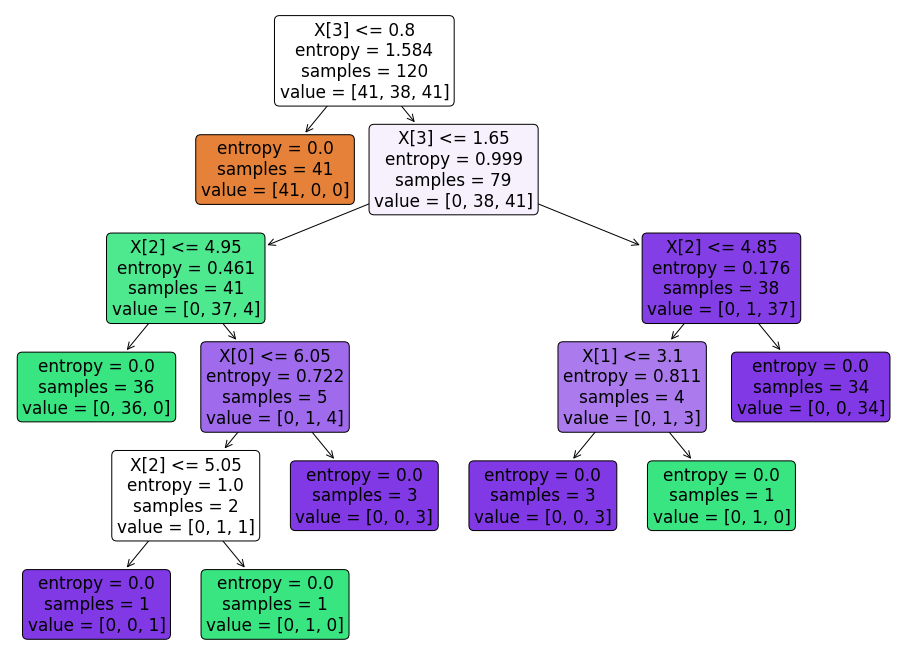

In [ ]:
#Visualising the Tree
plt.figure(figsize = (16,12))
# Plot the decision tree.
plot_tree(model1, rounded = True, filled = True)
# Display the tree plot figure.
plt.show()